<a href="https://colab.research.google.com/github/eddopera/colab/blob/main/Profissao_Analista_de_dados_M13_Exercicio_V02_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estado-bruto.xml'

with open(NOME_ARQUIVO_FONTE, 'r', encoding='utf-8') as arquivo:
    fonte = BeautifulSoup(arquivo, 'lxml')

/tmp/ipython-input-17-2683447704.py:6: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  fonte = BeautifulSoup(arquivo, 'lxml')


In [ ]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [ ]:
# manipule os dados

# continue o codigo aqui

estados = fonte.find_all('estado')

dados = []
for estado in estados:
    nome = estado.find('nome').text.strip()
    sigla = estado.find('sigla').text.strip()
    regiao = estado.find('regiao').text.strip()
    dados.append([nome, sigla, regiao])


In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# continue o codigo aqui

import pandas as pd

df_estados = pd.DataFrame(dados, columns=['estado', 'sigla', 'regiao'])

df_estados.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = ... # continue o codigo aqui

import pandas as pd

fonte = pd.read_csv(NOME_ARQUIVO_FONTE)

In [ ]:
# visualize os resultados

# continue o codigo aqui

fonte.columns

Index(['FID', 'gid', 'UF', 'nome', 'Censo', 'PIB', 'Pop_est_2009',
       'PIB_percapita', 'Descrição', 'legenda', 'classe', 'geom'],
      dtype='object')

In [ ]:
# manipule os dados

# continue o codigo aqui

colunas = ['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']

cidades_filtradas = fonte[fonte['Censo'] == 2010][colunas]

cidades_filtradas.columns = ['estado', 'cidade', 'pib', 'populacao', 'pib_percapita']

cidades_filtradas = cidades_filtradas[['estado', 'cidade', 'populacao', 'pib', 'pib_percapita']]


In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui

cidades_filtradas.to_csv('cidades-limpo.csv', sep=';', index=False)


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
import pandas as pd

estados = pd.read_csv('estados-limpo.csv', sep=';')
cidades = pd.read_csv('cidades-limpo.csv', sep=';')
brasil = cidades.merge(estados, left_on='estado', right_on='estado', how='left')
brasil = brasil[['estado', 'sigla', 'regiao', 'cidade', 'populacao', 'pib', 'pib_percapita']]
brasil.to_csv('brasil.csv', sep=';', index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1

import pandas as pd

brasil_df = pd.read_csv('brasil.csv', sep=';')

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta

top10_pop = brasil_df.sort_values('populacao', ascending=False).head(10)
print(top10_pop[['cidade', 'estado', 'populacao']])

              cidade            estado  populacao
4921       São Paulo         SÃO PAULO   11037593
785   Rio de Janeiro    RIO DE JANEIRO    6186710
519         Salvador             BAHIA    2998056
3070        Brasília  DISTRITO FEDERAL    2606885
4523       Fortaleza             CEARÁ    2505552
4871  Belo Horizonte      MINAS GERAIS    2452617
1812        Curitiba            PARANÁ    1851215
333           Manaus          AMAZONAS    1738641
3542          Recife        PERNAMBUCO    1561659
5219           Belém              PARÁ    1437600


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta

nordeste = brasil_df[brasil_df['regiao'] == 'NORDESTE']
menor_pib_percapita = nordeste.sort_values('pib_percapita').head(5)
print(menor_pib_percapita[['cidade', 'estado', 'pib_percapita']])

            cidade   estado  pib_percapita
4726      Caetanos    BAHIA    2440.570068
4838  Novo Triunfo    BAHIA    2497.060059
3531        Matina    BAHIA    2551.989990
1566        Traipu  ALAGOAS    2649.479980
2674      Mansidão    BAHIA    2665.449951


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta

sp = brasil_df[brasil_df['estado'] == 'SAO PAULO']
top15_pib_sp = sp.sort_values('pib', ascending=False).head(15)
print(top15_pib_sp[['cidade', 'pib']])

Empty DataFrame
Columns: [cidade, pib]
Index: []


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
# código para responder a pergunta

sc = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']
pib_sc = sc['pib'].sum()
print(pib_sc)

129806256.75195317


 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta
sul = brasil_df[brasil_df['regiao'] == 'SUL']
pop_sul = sul['populacao'].sum()
print(pop_sul)

17032871


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta
ms = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']
pib_percapita_ms = ms['pib_percapita'].mean()
print(pib_percapita_ms)

14458.896859975644


 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta
pop_brasil = brasil_df['populacao'].sum()
print(pop_brasil)

191176146


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: title={'center': '10 Cidades Menos Populosas do Brasil'}, xlabel='cidade'>

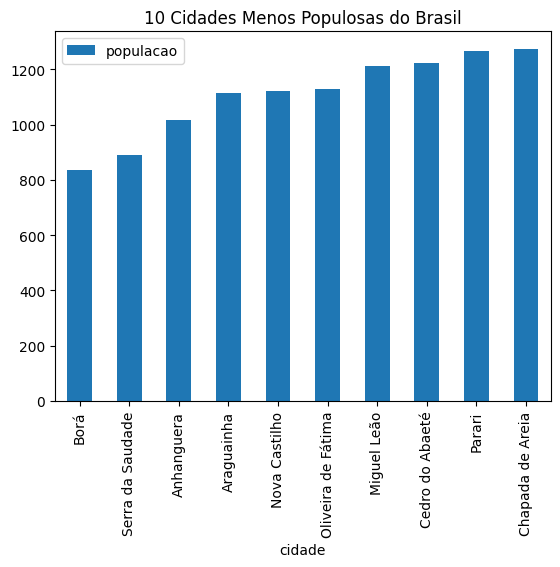

In [ ]:
# código para gerar a visualização

bottom10_pop = brasil_df.sort_values('populacao').head(10)
bottom10_pop.plot(kind='bar', x='cidade', y='populacao', title='10 Cidades Menos Populosas do Brasil')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: title={'center': 'Proporção da População por Região'}, ylabel='populacao'>

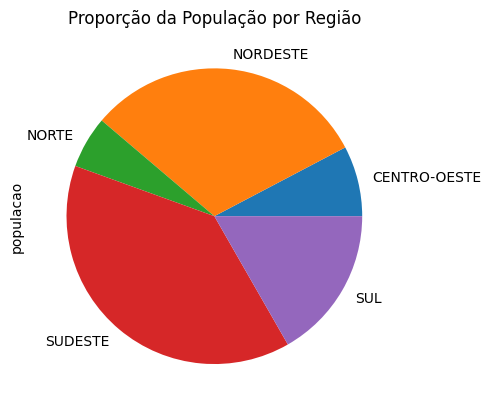

In [ ]:
# código para gerar a visualização

pop_por_regiao = brasil_df.groupby('regiao')['populacao'].sum()
pop_por_regiao.plot(kind='pie', title='Proporção da População por Região')